# Figure 2: Coefficient of variation (CV) maps

Notes: use ff2 instead of ff1

Remove fgoals-gl. Add AWAP

In [28]:
# import things
import xarray as xr
import numpy as np
import matplotlib.pyplot as plt
import cftime
import regionmask
import xesmf as xe 

# this is all for plotting...
import cartopy.crs as ccrs
from cartopy.util import add_cyclic_point
from cartopy.mpl.geoaxes import GeoAxes
from cartopy.mpl.ticker import LongitudeFormatter, LatitudeFormatter
from mpl_toolkits.axes_grid1 import AxesGrid
from matplotlib.colors import BoundaryNorm
from matplotlib.colors import LinearSegmentedColormap
import cartopy.feature as cfeature
import matplotlib.mlab as mlab
import cartopy.io.shapereader as shapereader
from dask.diagnostics import ProgressBar
from scipy import stats
import os

import matplotlib as mpl
mpl.rcParams['font.sans-serif'] = 'Helvetica'
mpl.rcParams['pdf.fonttype'] = 42 # change font from Arial (used in initial submission) to Helvetica

import copy

import warnings
warnings.filterwarnings('ignore')

import sys
sys.path.append('/Users/nickywright/repos/palaeoclimate-lastmillennium')
import gmtColormap as gmtColormap

# Import files

In [3]:
# input_dir = '/g/data/w35/nw3057/drought_frequencies/'
input_dir = '/Volumes/LaCie/droughts_through_time/files'

In [5]:
historical_year = 1900
input_dir_hist = '%s/historical_%s' % (input_dir, historical_year)

ff1_precip_hist_annual_aus  = xr.open_dataset('%s/ff%s_precip_hist_annual_aus.nc' % (input_dir_hist, '1'))
ff2_precip_hist_annual_aus  = xr.open_dataset('%s/ff%s_precip_hist_annual_aus.nc' % (input_dir_hist, '2'))
ff3_precip_hist_annual_aus  = xr.open_dataset('%s/ff%s_precip_hist_annual_aus.nc' % (input_dir_hist, '3'))
ff4_precip_hist_annual_aus  = xr.open_dataset('%s/ff%s_precip_hist_annual_aus.nc' % (input_dir_hist, '4'))
ff5_precip_hist_annual_aus  = xr.open_dataset('%s/ff%s_precip_hist_annual_aus.nc' % (input_dir_hist, '5'))
ff6_precip_hist_annual_aus  = xr.open_dataset('%s/ff%s_precip_hist_annual_aus.nc' % (input_dir_hist, '6'))
ff7_precip_hist_annual_aus  = xr.open_dataset('%s/ff%s_precip_hist_annual_aus.nc' % (input_dir_hist, '7'))
ff8_precip_hist_annual_aus  = xr.open_dataset('%s/ff%s_precip_hist_annual_aus.nc' % (input_dir_hist, '8'))
ff9_precip_hist_annual_aus  = xr.open_dataset('%s/ff%s_precip_hist_annual_aus.nc' % (input_dir_hist, '9'))
ff10_precip_hist_annual_aus = xr.open_dataset('%s/ff%s_precip_hist_annual_aus.nc' % (input_dir_hist, '10'))
ff11_precip_hist_annual_aus = xr.open_dataset('%s/ff%s_precip_hist_annual_aus.nc' % (input_dir_hist, '11'))
ff12_precip_hist_annual_aus = xr.open_dataset('%s/ff%s_precip_hist_annual_aus.nc' % (input_dir_hist, '12'))
ff13_precip_hist_annual_aus = xr.open_dataset('%s/ff%s_precip_hist_annual_aus.nc' % (input_dir_hist, '13'))

bcc_precip_hist_annual_aus = xr.open_dataset('%s/bcc_precip_hist_annual_aus.nc' % input_dir_hist)
ccsm4_precip_hist_annual_aus = xr.open_dataset('%s/ccsm4_precip_hist_annual_aus.nc' % input_dir_hist)
csiro_mk3l_precip_hist_annual_aus = xr.open_dataset('%s/csiro_mk3l_precip_hist_annual_aus.nc' % input_dir_hist)
fgoals_gl_precip_hist_annual_aus = xr.open_dataset('%s/fgoals_gl_precip_hist_annual_aus.nc' % input_dir_hist)
fgoals_s2_precip_hist_annual_aus = xr.open_dataset('%s/fgoals_s2_precip_hist_annual_aus.nc' % input_dir_hist)
giss_21_precip_hist_annual_aus = xr.open_dataset('%s/giss_21_precip_hist_annual_aus.nc' % input_dir_hist)
giss_22_precip_hist_annual_aus = xr.open_dataset('%s/giss_22_precip_hist_annual_aus.nc' % input_dir_hist)
giss_23_precip_hist_annual_aus = xr.open_dataset('%s/giss_23_precip_hist_annual_aus.nc' % input_dir_hist)
giss_24_precip_hist_annual_aus = xr.open_dataset('%s/giss_24_precip_hist_annual_aus.nc' % input_dir_hist)
giss_25_precip_hist_annual_aus = xr.open_dataset('%s/giss_25_precip_hist_annual_aus.nc' % input_dir_hist)
giss_26_precip_hist_annual_aus = xr.open_dataset('%s/giss_26_precip_hist_annual_aus.nc' % input_dir_hist)
giss_27_precip_hist_annual_aus = xr.open_dataset('%s/giss_27_precip_hist_annual_aus.nc' % input_dir_hist)
giss_28_precip_hist_annual_aus = xr.open_dataset('%s/giss_28_precip_hist_annual_aus.nc' % input_dir_hist)
hadcm3_precip_hist_annual_aus = xr.open_dataset('%s/hadcm3_precip_hist_annual_aus.nc' % input_dir_hist)
ipsl_precip_hist_annual_aus = xr.open_dataset('%s/ipsl_precip_hist_annual_aus.nc' % input_dir_hist)
miroc_precip_hist_annual_aus = xr.open_dataset('%s/miroc_precip_hist_annual_aus.nc' % input_dir_hist)
mpi_precip_hist_annual_aus= xr.open_dataset('%s/mpi_precip_hist_annual_aus.nc' % input_dir_hist)
mri_precip_hist_annual_aus = xr.open_dataset('%s/mri_precip_hist_annual_aus.nc' % input_dir_hist)

# ensemble means
ff_all_precip_hist_annual_aus = xr.concat([ff1_precip_hist_annual_aus, ff2_precip_hist_annual_aus, 
                                           ff3_precip_hist_annual_aus, ff4_precip_hist_annual_aus, 
                                           ff5_precip_hist_annual_aus, ff6_precip_hist_annual_aus,
                                           ff7_precip_hist_annual_aus, ff8_precip_hist_annual_aus,
                                           ff9_precip_hist_annual_aus, ff10_precip_hist_annual_aus, 
                                           ff11_precip_hist_annual_aus, ff12_precip_hist_annual_aus, 
                                           ff13_precip_hist_annual_aus], dim='en')
ff_all_precip_hist_annual_aus_mean = ff_all_precip_hist_annual_aus.mean(dim='en')

giss_all_precip_hist_annual_aus = xr.concat([giss_21_precip_hist_annual_aus, giss_22_precip_hist_annual_aus,
                                             giss_23_precip_hist_annual_aus, giss_24_precip_hist_annual_aus,
                                             giss_25_precip_hist_annual_aus, giss_26_precip_hist_annual_aus,
                                             giss_27_precip_hist_annual_aus, giss_28_precip_hist_annual_aus], dim='en')

giss_all_precip_hist_annual_aus_mean = giss_all_precip_hist_annual_aus.mean(dim='en')

In [6]:
# import awap
awap_gf_annual = xr.open_dataset('%s/awap_gf_precip_hist_annual.nc' % input_dir_hist)



import significance tests

In [7]:
bcc_hist_vs_awap_sig_kstest = xr.open_dataset('%s/bcc_hist_vs_awap_sig_kstest.nc' % input_dir_hist)
ccsm4_hist_vs_awap_sig_kstest = xr.open_dataset('%s/ccsm4_hist_vs_awap_sig_kstest.nc' % input_dir_hist)
csiro_mk3l_hist_vs_awap_sig_kstest = xr.open_dataset('%s/csiro_mk3l_hist_vs_awap_sig_kstest.nc' % input_dir_hist)
fgoals_gl_hist_vs_awap_sig_kstest = xr.open_dataset('%s/fgoals_gl_hist_vs_awap_sig_kstest.nc' % input_dir_hist)
fgoals_s2_hist_vs_awap_sig_kstest = xr.open_dataset('%s/fgoals_s2_hist_vs_awap_sig_kstest.nc' % input_dir_hist)
giss_21_hist_vs_awap_sig_kstest = xr.open_dataset('%s/giss_21_hist_vs_awap_sig_kstest.nc' % input_dir_hist)
giss_22_hist_vs_awap_sig_kstest = xr.open_dataset('%s/giss_22_hist_vs_awap_sig_kstest.nc' % input_dir_hist)
giss_23_hist_vs_awap_sig_kstest = xr.open_dataset('%s/giss_23_hist_vs_awap_sig_kstest.nc' % input_dir_hist)
giss_24_hist_vs_awap_sig_kstest = xr.open_dataset('%s/giss_24_hist_vs_awap_sig_kstest.nc' % input_dir_hist)
giss_25_hist_vs_awap_sig_kstest = xr.open_dataset('%s/giss_25_hist_vs_awap_sig_kstest.nc' % input_dir_hist)
giss_26_hist_vs_awap_sig_kstest = xr.open_dataset('%s/giss_26_hist_vs_awap_sig_kstest.nc' % input_dir_hist)
giss_27_hist_vs_awap_sig_kstest = xr.open_dataset('%s/giss_27_hist_vs_awap_sig_kstest.nc' % input_dir_hist)
giss_28_hist_vs_awap_sig_kstest = xr.open_dataset('%s/giss_28_hist_vs_awap_sig_kstest.nc' % input_dir_hist)
hadcm3_hist_vs_awap_sig_kstest = xr.open_dataset('%s/hadcm3_hist_vs_awap_sig_kstest.nc' % input_dir_hist)
ipsl_hist_vs_awap_sig_kstest = xr.open_dataset('%s/ipsl_hist_vs_awap_sig_kstest.nc' % input_dir_hist)
miroc_hist_vs_awap_sig_kstest = xr.open_dataset('%s/miroc_hist_vs_awap_sig_kstest.nc' % input_dir_hist)
mpi_hist_vs_awap_sig_kstest = xr.open_dataset('%s/mpi_hist_vs_awap_sig_kstest.nc' % input_dir_hist)
mri_hist_vs_awap_sig_kstest = xr.open_dataset('%s/mri_hist_vs_awap_sig_kstest.nc' % input_dir_hist)
ff1_hist_vs_awap_sig_kstest = xr.open_dataset('%s/ff1_hist_vs_awap_sig_kstest.nc' % input_dir_hist)
ff2_hist_vs_awap_sig_kstest = xr.open_dataset('%s/ff2_hist_vs_awap_sig_kstest.nc' % input_dir_hist)
ff3_hist_vs_awap_sig_kstest = xr.open_dataset('%s/ff3_hist_vs_awap_sig_kstest.nc' % input_dir_hist)
ff4_hist_vs_awap_sig_kstest = xr.open_dataset('%s/ff4_hist_vs_awap_sig_kstest.nc' % input_dir_hist)
ff5_hist_vs_awap_sig_kstest = xr.open_dataset('%s/ff5_hist_vs_awap_sig_kstest.nc' % input_dir_hist)
ff6_hist_vs_awap_sig_kstest = xr.open_dataset('%s/ff6_hist_vs_awap_sig_kstest.nc' % input_dir_hist)
ff7_hist_vs_awap_sig_kstest = xr.open_dataset('%s/ff7_hist_vs_awap_sig_kstest.nc' % input_dir_hist)
ff8_hist_vs_awap_sig_kstest = xr.open_dataset('%s/ff8_hist_vs_awap_sig_kstest.nc' % input_dir_hist)
ff9_hist_vs_awap_sig_kstest = xr.open_dataset('%s/ff9_hist_vs_awap_sig_kstest.nc' % input_dir_hist)
ff10_hist_vs_awap_sig_kstest = xr.open_dataset('%s/ff10_hist_vs_awap_sig_kstest.nc' % input_dir_hist)
ff11_hist_vs_awap_sig_kstest = xr.open_dataset('%s/ff11_hist_vs_awap_sig_kstest.nc' % input_dir_hist)
ff12_hist_vs_awap_sig_kstest = xr.open_dataset('%s/ff12_hist_vs_awap_sig_kstest.nc' % input_dir_hist)
ff13_hist_vs_awap_sig_kstest = xr.open_dataset('%s/ff13_hist_vs_awap_sig_kstest.nc' % input_dir_hist)

# mannwhitneyu
bcc_hist_vs_awap_sig_mannwhitneyu = xr.open_dataset('%s/bcc_hist_vs_awap_sig_mannwhitneyu.nc' % input_dir_hist)
ccsm4_hist_vs_awap_sig_mannwhitneyu = xr.open_dataset('%s/ccsm4_hist_vs_awap_sig_mannwhitneyu.nc' % input_dir_hist)
csiro_mk3l_hist_vs_awap_sig_mannwhitneyu = xr.open_dataset('%s/csiro_mk3l_hist_vs_awap_sig_mannwhitneyu.nc' % input_dir_hist)
fgoals_gl_hist_vs_awap_sig_mannwhitneyu = xr.open_dataset('%s/fgoals_gl_hist_vs_awap_sig_mannwhitneyu.nc' % input_dir_hist)
fgoals_s2_hist_vs_awap_sig_mannwhitneyu = xr.open_dataset('%s/fgoals_s2_hist_vs_awap_sig_mannwhitneyu.nc' % input_dir_hist)
giss_21_hist_vs_awap_sig_mannwhitneyu = xr.open_dataset('%s/giss_21_hist_vs_awap_sig_mannwhitneyu.nc' % input_dir_hist)
giss_22_hist_vs_awap_sig_mannwhitneyu = xr.open_dataset('%s/giss_22_hist_vs_awap_sig_mannwhitneyu.nc' % input_dir_hist)
giss_23_hist_vs_awap_sig_mannwhitneyu = xr.open_dataset('%s/giss_23_hist_vs_awap_sig_mannwhitneyu.nc' % input_dir_hist)
giss_24_hist_vs_awap_sig_mannwhitneyu = xr.open_dataset('%s/giss_24_hist_vs_awap_sig_mannwhitneyu.nc' % input_dir_hist)
giss_25_hist_vs_awap_sig_mannwhitneyu = xr.open_dataset('%s/giss_25_hist_vs_awap_sig_mannwhitneyu.nc' % input_dir_hist)
giss_26_hist_vs_awap_sig_mannwhitneyu = xr.open_dataset('%s/giss_26_hist_vs_awap_sig_mannwhitneyu.nc' % input_dir_hist)
giss_27_hist_vs_awap_sig_mannwhitneyu = xr.open_dataset('%s/giss_27_hist_vs_awap_sig_mannwhitneyu.nc' % input_dir_hist)
giss_28_hist_vs_awap_sig_mannwhitneyu = xr.open_dataset('%s/giss_28_hist_vs_awap_sig_mannwhitneyu.nc' % input_dir_hist)
hadcm3_hist_vs_awap_sig_mannwhitneyu = xr.open_dataset('%s/hadcm3_hist_vs_awap_sig_mannwhitneyu.nc' % input_dir_hist)
ipsl_hist_vs_awap_sig_mannwhitneyu = xr.open_dataset('%s/ipsl_hist_vs_awap_sig_mannwhitneyu.nc' % input_dir_hist)
miroc_hist_vs_awap_sig_mannwhitneyu= xr.open_dataset('%s/miroc_hist_vs_awap_sig_mannwhitneyu.nc' % input_dir_hist)
mpi_hist_vs_awap_sig_mannwhitneyu = xr.open_dataset('%s/mpi_hist_vs_awap_sig_mannwhitneyu.nc' % input_dir_hist)
mri_hist_vs_awap_sig_mannwhitneyu = xr.open_dataset('%s/mri_hist_vs_awap_sig_mannwhitneyu.nc' % input_dir_hist)
ff1_hist_vs_awap_sig_mannwhitneyu = xr.open_dataset('%s/ff1_hist_vs_awap_sig_mannwhitneyu.nc' % input_dir_hist)
ff2_hist_vs_awap_sig_mannwhitneyu = xr.open_dataset('%s/ff2_hist_vs_awap_sig_mannwhitneyu.nc' % input_dir_hist)
ff3_hist_vs_awap_sig_mannwhitneyu = xr.open_dataset('%s/ff3_hist_vs_awap_sig_mannwhitneyu.nc' % input_dir_hist)
ff4_hist_vs_awap_sig_mannwhitneyu = xr.open_dataset('%s/ff4_hist_vs_awap_sig_mannwhitneyu.nc' % input_dir_hist)
ff5_hist_vs_awap_sig_mannwhitneyu = xr.open_dataset('%s/ff5_hist_vs_awap_sig_mannwhitneyu.nc' % input_dir_hist)
ff6_hist_vs_awap_sig_mannwhitneyu = xr.open_dataset('%s/ff6_hist_vs_awap_sig_mannwhitneyu.nc' % input_dir_hist)
ff7_hist_vs_awap_sig_mannwhitneyu = xr.open_dataset('%s/ff7_hist_vs_awap_sig_mannwhitneyu.nc' % input_dir_hist)
ff8_hist_vs_awap_sig_mannwhitneyu = xr.open_dataset('%s/ff8_hist_vs_awap_sig_mannwhitneyu.nc' % input_dir_hist)
ff9_hist_vs_awap_sig_mannwhitneyu = xr.open_dataset('%s/ff9_hist_vs_awap_sig_mannwhitneyu.nc' % input_dir_hist)
ff10_hist_vs_awap_sig_mannwhitneyu = xr.open_dataset('%s/ff10_hist_vs_awap_sig_mannwhitneyu.nc' % input_dir_hist)
ff11_hist_vs_awap_sig_mannwhitneyu = xr.open_dataset('%s/ff11_hist_vs_awap_sig_mannwhitneyu.nc' % input_dir_hist)
ff12_hist_vs_awap_sig_mannwhitneyu = xr.open_dataset('%s/ff12_hist_vs_awap_sig_mannwhitneyu.nc' % input_dir_hist)
ff13_hist_vs_awap_sig_mannwhitneyu = xr.open_dataset('%s/ff13_hist_vs_awap_sig_mannwhitneyu.nc' % input_dir_hist)

In [8]:
giss_all_hist_vs_awap_sig_mannwhitneyu = xr.open_dataset('%s/giss_all_hist_vs_awap_sig_mannwhitneyu.nc' % input_dir_hist)
ff_all_hist_vs_awap_sig_mannwhitneyu = xr.open_dataset('%s/ff_all_hist_vs_awap_sig_mannwhitneyu.nc' % input_dir_hist)
giss_all_hist_vs_awap_sig_kstest = xr.open_dataset('%s/giss_all_hist_vs_awap_sig_kstest.nc' % input_dir_hist)
ff_all_hist_vs_awap_sig_kstest = xr.open_dataset('%s/ff_all_hist_vs_awap_sig_kstest.nc' % input_dir_hist)

### last millennium files

In [9]:
input_dir_lm = '%s/lastmillennium_threshold_1900-2000' % (input_dir)

ff1_precip_lm_annual_aus = xr.open_dataset('%s/ff%s_precip_lm_annual_aus.nc' % (input_dir_lm, '1'))
ff2_precip_lm_annual_aus = xr.open_dataset('%s/ff%s_precip_lm_annual_aus.nc' % (input_dir_lm, '2'))
ff3_precip_lm_annual_aus = xr.open_dataset('%s/ff%s_precip_lm_annual_aus.nc' % (input_dir_lm, '3'))
ff4_precip_lm_annual_aus = xr.open_dataset('%s/ff%s_precip_lm_annual_aus.nc' % (input_dir_lm, '4'))
ff5_precip_lm_annual_aus = xr.open_dataset('%s/ff%s_precip_lm_annual_aus.nc' % (input_dir_lm, '5'))
ff6_precip_lm_annual_aus = xr.open_dataset('%s/ff%s_precip_lm_annual_aus.nc' % (input_dir_lm, '6'))
ff7_precip_lm_annual_aus = xr.open_dataset('%s/ff%s_precip_lm_annual_aus.nc' % (input_dir_lm, '7'))
ff8_precip_lm_annual_aus = xr.open_dataset('%s/ff%s_precip_lm_annual_aus.nc' % (input_dir_lm, '8'))
ff9_precip_lm_annual_aus = xr.open_dataset('%s/ff%s_precip_lm_annual_aus.nc' % (input_dir_lm, '9'))
ff10_precip_lm_annual_aus = xr.open_dataset('%s/ff%s_precip_lm_annual_aus.nc' % (input_dir_lm, '10'))
ff11_precip_lm_annual_aus = xr.open_dataset('%s/ff%s_precip_lm_annual_aus.nc' % (input_dir_lm, '11'))
ff12_precip_lm_annual_aus = xr.open_dataset('%s/ff%s_precip_lm_annual_aus.nc' % (input_dir_lm, '12'))
ff13_precip_lm_annual_aus = xr.open_dataset('%s/ff%s_precip_lm_annual_aus.nc' % (input_dir_lm, '13'))

bcc_precip_lm_annual_aus = xr.open_dataset('%s/bcc_precip_lm_annual_aus.nc' % input_dir_lm)
ccsm4_precip_lm_annual_aus = xr.open_dataset('%s/ccsm4_precip_lm_annual_aus.nc' % input_dir_lm)
csiro_mk3l_precip_lm_annual_aus = xr.open_dataset('%s/csiro_mk3l_precip_lm_annual_aus.nc' % input_dir_lm)
fgoals_gl_precip_lm_annual_aus = xr.open_dataset('%s/fgoals_gl_precip_lm_annual_aus.nc' % input_dir_lm)
fgoals_s2_precip_lm_annual_aus = xr.open_dataset('%s/fgoals_s2_precip_lm_annual_aus.nc' % input_dir_lm)
giss_21_precip_lm_annual_aus = xr.open_dataset('%s/giss_21_precip_lm_annual_aus.nc' % input_dir_lm)
giss_22_precip_lm_annual_aus = xr.open_dataset('%s/giss_22_precip_lm_annual_aus.nc' % input_dir_lm)
giss_23_precip_lm_annual_aus = xr.open_dataset('%s/giss_23_precip_lm_annual_aus.nc' % input_dir_lm)
giss_24_precip_lm_annual_aus = xr.open_dataset('%s/giss_24_precip_lm_annual_aus.nc' % input_dir_lm)
giss_25_precip_lm_annual_aus = xr.open_dataset('%s/giss_25_precip_lm_annual_aus.nc' % input_dir_lm)
giss_26_precip_lm_annual_aus = xr.open_dataset('%s/giss_26_precip_lm_annual_aus.nc' % input_dir_lm)
giss_27_precip_lm_annual_aus = xr.open_dataset('%s/giss_27_precip_lm_annual_aus.nc' % input_dir_lm)
giss_28_precip_lm_annual_aus = xr.open_dataset('%s/giss_28_precip_lm_annual_aus.nc' % input_dir_lm)
hadcm3_precip_lm_annual_aus = xr.open_dataset('%s/hadcm3_precip_lm_annual_aus.nc' % input_dir_lm)
ipsl_precip_lm_annual_aus = xr.open_dataset('%s/ipsl_precip_lm_annual_aus.nc' % input_dir_lm)
miroc_precip_lm_annual_aus = xr.open_dataset('%s/miroc_precip_lm_annual_aus.nc' % input_dir_lm)
mpi_precip_lm_annual_aus= xr.open_dataset('%s/mpi_precip_lm_annual_aus.nc' % input_dir_lm)
mri_precip_lm_annual_aus = xr.open_dataset('%s/mri_precip_lm_annual_aus.nc' % input_dir_lm)

In [10]:
# ensemble means
ff_all_precip_lm_annual_aus = xr.concat([ff1_precip_lm_annual_aus, ff2_precip_lm_annual_aus, 
                                           ff3_precip_lm_annual_aus, ff4_precip_lm_annual_aus, 
                                           ff5_precip_lm_annual_aus, ff6_precip_lm_annual_aus,
                                           ff7_precip_lm_annual_aus, ff8_precip_lm_annual_aus,
                                           ff9_precip_lm_annual_aus, ff10_precip_lm_annual_aus, 
                                           ff11_precip_lm_annual_aus, ff12_precip_lm_annual_aus, 
                                           ff13_precip_lm_annual_aus], dim='en')
ff_all_precip_lm_annual_aus_mean = ff_all_precip_lm_annual_aus.mean(dim='en')

giss_all_precip_lm_annual_aus = xr.concat([giss_21_precip_lm_annual_aus, giss_22_precip_lm_annual_aus,
                                             giss_23_precip_lm_annual_aus, giss_24_precip_lm_annual_aus,
                                             giss_25_precip_lm_annual_aus, giss_26_precip_lm_annual_aus,
                                             giss_27_precip_lm_annual_aus, giss_28_precip_lm_annual_aus], dim='en')

giss_all_precip_lm_annual_aus_mean = giss_all_precip_lm_annual_aus.mean(dim='en')

In [11]:
bcc_hist_vs_lm_sig_kstest = xr.open_dataset('%s/bcc_hist_vs_lm_sig_kstest.nc' % input_dir_lm)
ccsm4_hist_vs_lm_sig_kstest = xr.open_dataset('%s/ccsm4_hist_vs_lm_sig_kstest.nc' % input_dir_lm)
csiro_mk3l_hist_vs_lm_sig_kstest = xr.open_dataset('%s/csiro_mk3l_hist_vs_lm_sig_kstest.nc' % input_dir_lm)
fgoals_gl_hist_vs_lm_sig_kstest = xr.open_dataset('%s/fgoals_gl_hist_vs_lm_sig_kstest.nc' % input_dir_lm)
fgoals_s2_hist_vs_lm_sig_kstest = xr.open_dataset('%s/fgoals_s2_hist_vs_lm_sig_kstest.nc' % input_dir_lm)
giss_21_hist_vs_lm_sig_kstest = xr.open_dataset('%s/giss_21_hist_vs_lm_sig_kstest.nc' % input_dir_lm)
giss_22_hist_vs_lm_sig_kstest = xr.open_dataset('%s/giss_22_hist_vs_lm_sig_kstest.nc' % input_dir_lm)
giss_23_hist_vs_lm_sig_kstest = xr.open_dataset('%s/giss_23_hist_vs_lm_sig_kstest.nc' % input_dir_lm)
giss_24_hist_vs_lm_sig_kstest = xr.open_dataset('%s/giss_24_hist_vs_lm_sig_kstest.nc' % input_dir_lm)
giss_25_hist_vs_lm_sig_kstest = xr.open_dataset('%s/giss_25_hist_vs_lm_sig_kstest.nc' % input_dir_lm)
giss_26_hist_vs_lm_sig_kstest = xr.open_dataset('%s/giss_26_hist_vs_lm_sig_kstest.nc' % input_dir_lm)
giss_27_hist_vs_lm_sig_kstest = xr.open_dataset('%s/giss_27_hist_vs_lm_sig_kstest.nc' % input_dir_lm)
giss_28_hist_vs_lm_sig_kstest = xr.open_dataset('%s/giss_28_hist_vs_lm_sig_kstest.nc' % input_dir_lm)
hadcm3_hist_vs_lm_sig_kstest = xr.open_dataset('%s/hadcm3_hist_vs_lm_sig_kstest.nc' % input_dir_lm)
ipsl_hist_vs_lm_sig_kstest = xr.open_dataset('%s/ipsl_hist_vs_lm_sig_kstest.nc' % input_dir_lm)
miroc_hist_vs_lm_sig_kstest = xr.open_dataset('%s/miroc_hist_vs_lm_sig_kstest.nc' % input_dir_lm)
mpi_hist_vs_lm_sig_kstest = xr.open_dataset('%s/mpi_hist_vs_lm_sig_kstest.nc' % input_dir_lm)
mri_hist_vs_lm_sig_kstest = xr.open_dataset('%s/mri_hist_vs_lm_sig_kstest.nc' % input_dir_lm)
ff1_hist_vs_lm_sig_kstest = xr.open_dataset('%s/ff1_hist_vs_lm_sig_kstest.nc' % input_dir_lm)
ff2_hist_vs_lm_sig_kstest = xr.open_dataset('%s/ff2_hist_vs_lm_sig_kstest.nc' % input_dir_lm)
ff3_hist_vs_lm_sig_kstest = xr.open_dataset('%s/ff3_hist_vs_lm_sig_kstest.nc' % input_dir_lm)
ff4_hist_vs_lm_sig_kstest = xr.open_dataset('%s/ff4_hist_vs_lm_sig_kstest.nc' % input_dir_lm)
ff5_hist_vs_lm_sig_kstest = xr.open_dataset('%s/ff5_hist_vs_lm_sig_kstest.nc' % input_dir_lm)
ff6_hist_vs_lm_sig_kstest = xr.open_dataset('%s/ff6_hist_vs_lm_sig_kstest.nc' % input_dir_lm)
ff7_hist_vs_lm_sig_kstest = xr.open_dataset('%s/ff7_hist_vs_lm_sig_kstest.nc' % input_dir_lm)
ff8_hist_vs_lm_sig_kstest = xr.open_dataset('%s/ff8_hist_vs_lm_sig_kstest.nc' % input_dir_lm)
ff9_hist_vs_lm_sig_kstest = xr.open_dataset('%s/ff9_hist_vs_lm_sig_kstest.nc' % input_dir_lm)
ff10_hist_vs_lm_sig_kstest = xr.open_dataset('%s/ff10_hist_vs_lm_sig_kstest.nc' % input_dir_lm)
ff11_hist_vs_lm_sig_kstest = xr.open_dataset('%s/ff11_hist_vs_lm_sig_kstest.nc' % input_dir_lm)
ff12_hist_vs_lm_sig_kstest = xr.open_dataset('%s/ff12_hist_vs_lm_sig_kstest.nc' % input_dir_lm)
ff13_hist_vs_lm_sig_kstest = xr.open_dataset('%s/ff13_hist_vs_lm_sig_kstest.nc' % input_dir_lm)

# mannwhitneyu
bcc_hist_vs_lm_sig_mannwhitneyu = xr.open_dataset('%s/bcc_hist_vs_lm_sig_mannwhitneyu.nc' % input_dir_lm)
ccsm4_hist_vs_lm_sig_mannwhitneyu = xr.open_dataset('%s/ccsm4_hist_vs_lm_sig_mannwhitneyu.nc' % input_dir_lm)
csiro_mk3l_hist_vs_lm_sig_mannwhitneyu = xr.open_dataset('%s/csiro_mk3l_hist_vs_lm_sig_mannwhitneyu.nc' % input_dir_lm)
fgoals_gl_hist_vs_lm_sig_mannwhitneyu = xr.open_dataset('%s/fgoals_gl_hist_vs_lm_sig_mannwhitneyu.nc' % input_dir_lm)
fgoals_s2_hist_vs_lm_sig_mannwhitneyu = xr.open_dataset('%s/fgoals_s2_hist_vs_lm_sig_mannwhitneyu.nc' % input_dir_lm)
giss_21_hist_vs_lm_sig_mannwhitneyu = xr.open_dataset('%s/giss_21_hist_vs_lm_sig_mannwhitneyu.nc' % input_dir_lm)
giss_22_hist_vs_lm_sig_mannwhitneyu = xr.open_dataset('%s/giss_22_hist_vs_lm_sig_mannwhitneyu.nc' % input_dir_lm)
giss_23_hist_vs_lm_sig_mannwhitneyu = xr.open_dataset('%s/giss_23_hist_vs_lm_sig_mannwhitneyu.nc' % input_dir_lm)
giss_24_hist_vs_lm_sig_mannwhitneyu = xr.open_dataset('%s/giss_24_hist_vs_lm_sig_mannwhitneyu.nc' % input_dir_lm)
giss_25_hist_vs_lm_sig_mannwhitneyu = xr.open_dataset('%s/giss_25_hist_vs_lm_sig_mannwhitneyu.nc' % input_dir_lm)
giss_26_hist_vs_lm_sig_mannwhitneyu = xr.open_dataset('%s/giss_26_hist_vs_lm_sig_mannwhitneyu.nc' % input_dir_lm)
giss_27_hist_vs_lm_sig_mannwhitneyu = xr.open_dataset('%s/giss_27_hist_vs_lm_sig_mannwhitneyu.nc' % input_dir_lm)
giss_28_hist_vs_lm_sig_mannwhitneyu = xr.open_dataset('%s/giss_28_hist_vs_lm_sig_mannwhitneyu.nc' % input_dir_lm)
hadcm3_hist_vs_lm_sig_mannwhitneyu = xr.open_dataset('%s/hadcm3_hist_vs_lm_sig_mannwhitneyu.nc' % input_dir_lm)
ipsl_hist_vs_lm_sig_mannwhitneyu = xr.open_dataset('%s/ipsl_hist_vs_lm_sig_mannwhitneyu.nc' % input_dir_lm)
miroc_hist_vs_lm_sig_mannwhitneyu= xr.open_dataset('%s/miroc_hist_vs_lm_sig_mannwhitneyu.nc' % input_dir_lm)
mpi_hist_vs_lm_sig_mannwhitneyu = xr.open_dataset('%s/mpi_hist_vs_lm_sig_mannwhitneyu.nc' % input_dir_lm)
mri_hist_vs_lm_sig_mannwhitneyu = xr.open_dataset('%s/mri_hist_vs_lm_sig_mannwhitneyu.nc' % input_dir_lm)
ff1_hist_vs_lm_sig_mannwhitneyu = xr.open_dataset('%s/ff1_hist_vs_lm_sig_mannwhitneyu.nc' % input_dir_lm)
ff2_hist_vs_lm_sig_mannwhitneyu = xr.open_dataset('%s/ff2_hist_vs_lm_sig_mannwhitneyu.nc' % input_dir_lm)
ff3_hist_vs_lm_sig_mannwhitneyu = xr.open_dataset('%s/ff3_hist_vs_lm_sig_mannwhitneyu.nc' % input_dir_lm)
ff4_hist_vs_lm_sig_mannwhitneyu = xr.open_dataset('%s/ff4_hist_vs_lm_sig_mannwhitneyu.nc' % input_dir_lm)
ff5_hist_vs_lm_sig_mannwhitneyu = xr.open_dataset('%s/ff5_hist_vs_lm_sig_mannwhitneyu.nc' % input_dir_lm)
ff6_hist_vs_lm_sig_mannwhitneyu = xr.open_dataset('%s/ff6_hist_vs_lm_sig_mannwhitneyu.nc' % input_dir_lm)
ff7_hist_vs_lm_sig_mannwhitneyu = xr.open_dataset('%s/ff7_hist_vs_lm_sig_mannwhitneyu.nc' % input_dir_lm)
ff8_hist_vs_lm_sig_mannwhitneyu = xr.open_dataset('%s/ff8_hist_vs_lm_sig_mannwhitneyu.nc' % input_dir_lm)
ff9_hist_vs_lm_sig_mannwhitneyu = xr.open_dataset('%s/ff9_hist_vs_lm_sig_mannwhitneyu.nc' % input_dir_lm)
ff10_hist_vs_lm_sig_mannwhitneyu = xr.open_dataset('%s/ff10_hist_vs_lm_sig_mannwhitneyu.nc' % input_dir_lm)
ff11_hist_vs_lm_sig_mannwhitneyu = xr.open_dataset('%s/ff11_hist_vs_lm_sig_mannwhitneyu.nc' % input_dir_lm)
ff12_hist_vs_lm_sig_mannwhitneyu = xr.open_dataset('%s/ff12_hist_vs_lm_sig_mannwhitneyu.nc' % input_dir_lm)
ff13_hist_vs_lm_sig_mannwhitneyu = xr.open_dataset('%s/ff13_hist_vs_lm_sig_mannwhitneyu.nc' % input_dir_lm)

giss_all_hist_vs_lm_sig_kstest = xr.open_dataset('%s/giss_all_mean_hist_vs_lm_sig_kstest.nc' % input_dir_lm)
ff_all_hist_vs_lm_sig_kstest = xr.open_dataset('%s/ff_all_mean_hist_vs_lm_sig_kstest.nc' % input_dir_lm)

giss_all_hist_vs_lm_sig_mannwhitneyu = xr.open_dataset('%s/giss_all_mean_hist_vs_lm_sig_mannwhitneyu.nc' % input_dir_lm)
ff_all_hist_vs_lm_sig_mannwhitneyu = xr.open_dataset('%s/ff_all_mean_hist_vs_lm_sig_mannwhitneyu.nc' % input_dir_lm)


## import control files

In [12]:
cntl_dir = '%s/control/' % input_dir

cesmlme_cntl = xr.open_dataset('%s/cesmlme_precip_cntl_annual_aus.nc' % cntl_dir)
bcc_cntl = xr.open_dataset('%s/bcc_precip_cntl_annual_aus.nc' % cntl_dir)
ccsm4_cntl = xr.open_dataset('%s/ccsm4_precip_cntl_annual_aus.nc' % cntl_dir)
csiro_mk3l_cntl = xr.open_dataset('%s/csiro_mk3l_precip_cntl_annual_aus.nc' % cntl_dir)
# fgoals_gl_cntl = xr.open_dataset('%s/fgoals_gl/fgoals_gl_precip_annual*.nc' % boots_dir, concat_dim='n', combine='nested')
fgoals_s2_cntl = xr.open_dataset('%s/fgoals_s2_precip_cntl_annual_aus.nc' % cntl_dir)
giss_21_cntl = xr.open_dataset('%s/giss_2_precip_cntl_annual_aus.nc' % cntl_dir)
hadmc3_cntl = xr.open_dataset('%s/hadcm3_precip_cntl_annual_aus.nc' % cntl_dir)
ipsl_cntl = xr.open_dataset('%s/ipsl_precip_cntl_annual_aus.nc' % cntl_dir)
miroc_cntl = xr.open_dataset('%s/miroc_precip_cntl_annual_aus.nc' % cntl_dir)
mpi_cntl = xr.open_dataset('%s/mpi_precip_cntl_annual_aus.nc' % cntl_dir)
mri_cntl = xr.open_dataset('%s/mri_precip_cntl_annual_aus.nc' % cntl_dir)



In [13]:
cesmlme_hist_vs_cntl_sig_mannwhitneyu = xr.open_dataset('%s/ff2_hist_vs_cntl_sig_mannwhitneyu.nc' % cntl_dir)
bcc_hist_vs_cntl_sig_mannwhitneyu = xr.open_dataset('%s/bcc_hist_vs_cntl_sig_mannwhitneyu.nc' % cntl_dir)
ccsm4_hist_vs_cntl_sig_mannwhitneyu = xr.open_dataset('%s/ccsm4_hist_vs_cntl_sig_mannwhitneyu.nc' % cntl_dir)
csiro_mk3l_hist_vs_cntl_sig_mannwhitneyu = xr.open_dataset('%s/csiro_mk3l_hist_vs_cntl_sig_mannwhitneyu.nc' % cntl_dir)
# fgoals_gl_cntl = xr.open_dataset('%s/fgoals_gl/fgoals_gl_precip_annual*.nc' % boots_dir, concat_dim='n', combine='nested')
fgoals_s2_hist_vs_cntl_sig_mannwhitneyu = xr.open_dataset('%s/fgoals_s2_hist_vs_cntl_sig_mannwhitneyu.nc' % cntl_dir)
giss_21_hist_vs_cntl_sig_mannwhitneyu = xr.open_dataset('%s/giss_21_hist_vs_cntl_sig_mannwhitneyu.nc' % cntl_dir)
hadcm3_hist_vs_cntl_sig_mannwhitneyu = xr.open_dataset('%s/hadcm3_hist_vs_cntl_sig_mannwhitneyu.nc' % cntl_dir)
ipsl_hist_vs_cntl_sig_mannwhitneyu = xr.open_dataset('%s/ipsl_hist_vs_cntl_sig_mannwhitneyu.nc' % cntl_dir)
miroc_hist_vs_cntl_sig_mannwhitneyu = xr.open_dataset('%s/miroc_hist_vs_cntl_sig_mannwhitneyu.nc' % cntl_dir)
mpi_hist_vs_cntl_sig_mannwhitneyu = xr.open_dataset('%s/mpi_hist_vs_cntl_sig_mannwhitneyu.nc' % cntl_dir)
mri_hist_vs_cntl_sig_mannwhitneyu = xr.open_dataset('%s/mri_hist_vs_cntl_sig_mannwhitneyu.nc' % cntl_dir)

cesmlme_hist_vs_cntl_sig_kstest = xr.open_dataset('%s/ff2_hist_vs_cntl_sig_kstest.nc' % cntl_dir)
bcc_hist_vs_cntl_sig_kstest = xr.open_dataset('%s/bcc_hist_vs_cntl_sig_kstest.nc' % cntl_dir)
ccsm4_hist_vs_cntl_sig_kstest = xr.open_dataset('%s/ccsm4_hist_vs_cntl_sig_kstest.nc' % cntl_dir)
csiro_mk3l_hist_vs_cntl_sig_kstest = xr.open_dataset('%s/csiro_mk3l_hist_vs_cntl_sig_kstest.nc' % cntl_dir)
# fgoals_gl_cntl = xr.open_dataset('%s/fgoals_gl/fgoals_gl_precip_annual*.nc' % boots_dir, concat_dim='n', combine='nested')
fgoals_s2_hist_vs_cntl_sig_kstest = xr.open_dataset('%s/fgoals_s2_hist_vs_cntl_sig_kstest.nc' % cntl_dir)
giss_21_hist_vs_cntl_sig_kstest = xr.open_dataset('%s/giss_21_hist_vs_cntl_sig_kstest.nc' % cntl_dir)
hadcm3_hist_vs_cntl_sig_kstest = xr.open_dataset('%s/hadcm3_hist_vs_cntl_sig_kstest.nc' % cntl_dir)
ipsl_hist_vs_cntl_sig_kstest = xr.open_dataset('%s/ipsl_hist_vs_cntl_sig_kstest.nc' % cntl_dir)
miroc_hist_vs_cntl_sig_kstest = xr.open_dataset('%s/miroc_hist_vs_cntl_sig_kstest.nc' % cntl_dir)
mpi_hist_vs_cntl_sig_kstest = xr.open_dataset('%s/mpi_hist_vs_cntl_sig_kstest.nc' % cntl_dir)
mri_hist_vs_cntl_sig_kstest = xr.open_dataset('%s/mri_hist_vs_cntl_sig_kstest.nc' % cntl_dir)
giss_28_hist_vs_cntl_sig_kstest = xr.open_dataset('%s/giss_28_hist_vs_2cntl_sig_kstest.nc' % cntl_dir)


In [14]:
# cesmlme_lm_vs_cntl_sig_mannwhitneyu = xr.open_dataset('%s/ff2_lm_vs_cntl_sig_mannwhitneyu.nc' % cntl_dir)
# bcc_lm_vs_cntl_sig_mannwhitneyu = xr.open_dataset('%s/bcc_lm_vs_cntl_sig_mannwhitneyu.nc' % cntl_dir)
# ccsm4_lm_vs_cntl_sig_mannwhitneyu = xr.open_dataset('%s/ccsm4_lm_vs_cntl_sig_mannwhitneyu.nc' % cntl_dir)
# csiro_mk3l_lm_vs_cntl_sig_mannwhitneyu = xr.open_dataset('%s/csiro_mk3l_lm_vs_cntl_sig_mannwhitneyu.nc' % cntl_dir)
# # fgoals_gl_cntl = xr.open_dataset('%s/fgoals_gl/fgoals_gl_precip_annual*.nc' % boots_dir, concat_dim='n', combine='nested')
# fgoals_s2_lm_vs_cntl_sig_mannwhitneyu = xr.open_dataset('%s/fgoals_s2_lm_vs_cntl_sig_mannwhitneyu.nc' % cntl_dir)
# giss_21_lm_vs_cntl_sig_mannwhitneyu = xr.open_dataset('%s/giss_21_lm_vs_cntl_sig_mannwhitneyu.nc' % cntl_dir)
# hadcm3_lm_vs_cntl_sig_mannwhitneyu = xr.open_dataset('%s/hadcm3_lm_vs_cntl_sig_mannwhitneyu.nc' % cntl_dir)
# ipsl_lm_vs_cntl_sig_mannwhitneyu = xr.open_dataset('%s/ipsl_lm_vs_cntl_sig_mannwhitneyu.nc' % cntl_dir)
# miroc_lm_vs_cntl_sig_mannwhitneyu = xr.open_dataset('%s/miroc_lm_vs_cntl_sig_mannwhitneyu.nc' % cntl_dir)
# mpi_lm_vs_cntl_sig_mannwhitneyu = xr.open_dataset('%s/mpi_lm_vs_cntl_sig_mannwhitneyu.nc' % cntl_dir)
# mri_lm_vs_cntl_sig_mannwhitneyu = xr.open_dataset('%s/mri_lm_vs_cntl_sig_mannwhitneyu.nc' % cntl_dir)

cesmlme_lm_vs_cntl_sig_kstest = xr.open_dataset('%s/ff2_lm_vs_cntl_sig_kstest.nc' % cntl_dir)
bcc_lm_vs_cntl_sig_kstest = xr.open_dataset('%s/bcc_lm_vs_cntl_sig_kstest.nc' % cntl_dir)
ccsm4_lm_vs_cntl_sig_kstest = xr.open_dataset('%s/ccsm4_lm_vs_cntl_sig_kstest.nc' % cntl_dir)
csiro_mk3l_lm_vs_cntl_sig_kstest = xr.open_dataset('%s/csiro_mk3l_lm_vs_cntl_sig_kstest.nc' % cntl_dir)
# fgoals_gl_cntl = xr.open_dataset('%s/fgoals_gl/fgoals_gl_precip_annual*.nc' % boots_dir, concat_dim='n', combine='nested')
fgoals_s2_lm_vs_cntl_sig_kstest = xr.open_dataset('%s/fgoals_s2_lm_vs_cntl_sig_kstest.nc' % cntl_dir)
giss_21_lm_vs_cntl_sig_kstest = xr.open_dataset('%s/giss_21_lm_vs_cntl_sig_kstest.nc' % cntl_dir)
hadcm3_lm_vs_cntl_sig_kstest = xr.open_dataset('%s/hadcm3_lm_vs_cntl_sig_kstest.nc' % cntl_dir)
ipsl_lm_vs_cntl_sig_kstest = xr.open_dataset('%s/ipsl_lm_vs_cntl_sig_kstest.nc' % cntl_dir)
miroc_lm_vs_cntl_sig_kstest = xr.open_dataset('%s/miroc_lm_vs_cntl_sig_kstest.nc' % cntl_dir)
mpi_lm_vs_cntl_sig_kstest = xr.open_dataset('%s/mpi_lm_vs_cntl_sig_kstest.nc' % cntl_dir)
mri_lm_vs_cntl_sig_kstest = xr.open_dataset('%s/mri_lm_vs_cntl_sig_kstest.nc' % cntl_dir)
giss_28_lm_vs_cntl_sig_kstest = xr.open_dataset('%s/giss_28_lm_vs_2cntl_sig_kstest.nc' % cntl_dir)

In [15]:
bcc_lm_vs_cntl_sig_kstest.load()
ccsm4_lm_vs_cntl_sig_kstest.load()
csiro_mk3l_lm_vs_cntl_sig_kstest.load()
fgoals_gl_hist_vs_lm_sig_kstest.load()
fgoals_s2_lm_vs_cntl_sig_kstest.load()
giss_21_lm_vs_cntl_sig_kstest.load()
hadcm3_lm_vs_cntl_sig_kstest.load()
ipsl_lm_vs_cntl_sig_kstest.load()
miroc_lm_vs_cntl_sig_kstest.load()
mpi_lm_vs_cntl_sig_kstest.load()
mri_lm_vs_cntl_sig_kstest.load()
cesmlme_lm_vs_cntl_sig_kstest.load()

bcc_hist_vs_cntl_sig_kstest.load()
ccsm4_hist_vs_cntl_sig_kstest.load()
csiro_mk3l_hist_vs_cntl_sig_kstest.load()
fgoals_gl_hist_vs_lm_sig_kstest.load()
fgoals_s2_hist_vs_cntl_sig_kstest.load()
giss_21_hist_vs_cntl_sig_kstest.load()
hadcm3_hist_vs_cntl_sig_kstest.load()
ipsl_hist_vs_cntl_sig_kstest.load()
miroc_hist_vs_cntl_sig_kstest.load()
mpi_hist_vs_cntl_sig_kstest.load()
mri_hist_vs_cntl_sig_kstest.load()
cesmlme_hist_vs_cntl_sig_kstest.load()



<xarray.Dataset>
Dimensions:                        (lat: 15, lon: 16)
Coordinates:
  * lon                            (lon) float64 115.0 117.5 ... 150.0 152.5
  * lat                            (lat) float64 -42.63 -36.95 ... -14.21 -12.32
Data variables:
    droughts_2s2e                  (lat, lon) float64 nan nan nan ... nan nan
    droughts_2s2e_intensity        (lat, lon) float64 nan nan nan ... nan nan
    droughts_2s2e_severity         (lat, lon) float64 nan nan nan ... nan nan
    droughts_median                (lat, lon) float64 nan nan nan ... nan nan
    droughts_median_intensity      (lat, lon) float64 nan nan nan ... nan nan
    droughts_median_severity       (lat, lon) float64 nan nan nan ... nan nan
    droughts_20perc                (lat, lon) float64 nan nan nan ... nan nan
    droughts_20perc_intensity      (lat, lon) float64 nan nan nan ... nan nan
    droughts_20perc_severity       (lat, lon) float64 nan nan nan ... nan nan
    droughts_120pc_2med            (lat, lon) float64 nan nan nan ... nan nan
    droughts_120pc_2med_intensity  (lat, lon) float64 nan nan nan ... nan nan
    droughts_120pc_2med_severity   (lat, lon) float64 nan nan nan ... nan nan
    droughts_220pc_1med            (lat, lon) float64 nan nan nan ... nan nan
    droughts_220pc_1med_intensity  (lat, lon) float64 nan nan nan ... nan nan
    droughts_220pc_1med_severity   (lat, lon) float64 nan nan nan ... nan nan

In [16]:
bcc_cntl.load()
ccsm4_cntl.load()
csiro_mk3l_cntl.load()
fgoals_gl_precip_hist_annual_aus.load()
fgoals_s2_cntl.load()
giss_21_cntl.load()
hadmc3_cntl.load()
ipsl_cntl.load()
miroc_cntl.load()
mpi_cntl.load()
mri_cntl.load()
cesmlme_cntl.load()

<xarray.Dataset>
Dimensions:                           (lat: 15, lon: 16, year: 1156)
Coordinates:
  * lat                               (lat) float64 -42.63 -36.95 ... -12.32
  * lon                               (lon) float64 115.0 117.5 ... 150.0 152.5
  * year                              (year) int64 1049 1050 1051 ... 2203 2204
Data variables:
    PRECT                             (year, lat, lon) float32 nan nan ... nan
    PRECT_mm                          (year, lat, lon) float64 nan nan ... nan
    drought_years_2s2e                (year, lat, lon) float64 nan nan ... nan
    drought_years_median              (year, lat, lon) float64 nan nan ... nan
    drought_years_20perc              (year, lat, lon) float64 nan nan ... nan
    drought_years_120pc_2med          (year, lat, lon) float64 nan nan ... nan
    drought_years_220pc_1med          (year, lat, lon) float64 nan nan ... nan
    droughts_2s2e                     (year, lat, lon) float64 nan nan ... nan
    droughts_median                   (year, lat, lon) float64 nan nan ... nan
    droughts_20perc                   (year, lat, lon) float64 nan nan ... nan
    droughts_120pc_2med               (year, lat, lon) float64 nan nan ... nan
    droughts_220pc_1med               (year, lat, lon) float64 nan nan ... nan
    droughts_2s2e_max                 (lat, lon) float64 nan nan nan ... nan nan
    droughts_median_max               (lat, lon) float64 nan nan nan ... nan nan
    droughts_20perc_max               (lat, lon) float64 nan nan nan ... nan nan
    droughts_120pc_2med_max           (lat, lon) float64 nan nan nan ... nan nan
    droughts_220pc_1med_max           (lat, lon) float64 nan nan nan ... nan nan
    droughts_2s2e_mean                (lat, lon) float64 nan nan nan ... nan nan
    droughts_median_mean              (lat, lon) float64 nan nan nan ... nan nan
    droughts_20perc_mean              (lat, lon) float64 nan nan nan ... nan nan
    droughts_120pc_2med_mean          (lat, lon) float64 nan nan nan ... nan nan
    droughts_220pc_1med_mean          (lat, lon) float64 nan nan nan ... nan nan
    droughts_2s2e_no_of_events        (lat, lon) float64 nan nan nan ... nan nan
    droughts_median_no_of_events      (lat, lon) float64 nan nan nan ... nan nan
    droughts_20perc_no_of_events      (lat, lon) float64 nan nan nan ... nan nan
    droughts_120pc_2med_no_of_events  (lat, lon) float64 nan nan nan ... nan nan
    droughts_220pc_1med_no_of_events  (lat, lon) float64 nan nan nan ... nan nan
    droughts_2s2e_std                 (lat, lon) float64 nan nan nan ... nan nan
    droughts_median_std               (lat, lon) float64 nan nan nan ... nan nan
    droughts_20perc_std               (lat, lon) float64 nan nan nan ... nan nan
    droughts_120pc_2med_std           (lat, lon) float64 nan nan nan ... nan nan
    droughts_220pc_1med_std           (lat, lon) float64 nan nan nan ... nan nan
    droughts_2s2e_intensity           (year, lat, lon) float64 nan nan ... nan
    droughts_median_intensity         (year, lat, lon) float64 nan nan ... nan
    droughts_20perc_intensity         (year, lat, lon) float64 nan nan ... nan
    droughts_120pc_2med_intensity     (year, lat, lon) float64 nan nan ... nan
    droughts_220pc_1med_intensity     (year, lat, lon) float64 nan nan ... nan
    droughts_2s2e_severity            (year, lat, lon) float64 nan nan ... nan
    droughts_median_severity          (year, lat, lon) float64 nan nan ... nan
    droughts_20perc_severity          (year, lat, lon) float64 nan nan ... nan
    droughts_120pc_2med_severity      (year, lat, lon) float64 nan nan ... nan
    droughts_220pc_1med_severity      (year, lat, lon) float64 nan nan ... nan

## AWAP

In [17]:
historical_year = 1900
input_dir_hist = '%s/historical_%s' % (input_dir, historical_year)


awap_gf_annual = xr.open_dataset('%s/awap_gf_precip_hist_annual_v2.nc' % input_dir_hist)


## defs

In [58]:
def get_significance_for_plots(ds, ds_sig, drought_type, drought_type_sig, significance_threshold):
    # ds = original array
    # ds_sig = regridded version
    # models NEED to be in the same order in both
    
    ds_sig_0  = ds[0].where(ds_sig[0][drought_type_sig] < significance_threshold)
    ds_sig_1  = ds[1].where(ds_sig[1][drought_type_sig] < significance_threshold)
    ds_sig_2  = ds[2].where(ds_sig[2][drought_type_sig] < significance_threshold)
    ds_sig_3  = ds[3].where(ds_sig[3][drought_type_sig] < significance_threshold) 
    ds_sig_4  = ds[4].where(ds_sig[4][drought_type_sig] < significance_threshold)
    ds_sig_5  = ds[5].where(ds_sig[5][drought_type_sig] < significance_threshold)  
    ds_sig_6  = ds[6].where(ds_sig[6][drought_type_sig] < significance_threshold)  
    ds_sig_7  = ds[7].where(ds_sig[7][drought_type_sig] < significance_threshold)
    ds_sig_8  = ds[8].where(ds_sig[8][drought_type_sig] < significance_threshold)
    ds_sig_9  = ds[9].where(ds_sig[9][drought_type_sig] < significance_threshold) 
    ds_sig_10 = ds[10].where(ds_sig[10][drought_type_sig] < significance_threshold)
    ds_sig_11 = ds[11].where(ds_sig[11][drought_type_sig] < significance_threshold)
#     ds_sig_12 = ds[12].where(ds_sig[12][drought_type_sig] < significance_threshold) 
#     ds_sig_13 = ds[13].where(ds_sig[13][drought_type_sig] < significance_threshold)
    
    ds_sig_out = [ds_sig_0, ds_sig_1, ds_sig_2, ds_sig_3, ds_sig_4, ds_sig_5, ds_sig_6, 
                  ds_sig_7, ds_sig_8, ds_sig_9, ds_sig_10, ds_sig_11]
    
    return ds_sig_out

# plot map
def plot_maps(lons, lats, data, cmap, contour_levels, colorbar_label, filename, colorbar_ticks, colorbar_extend, cbar_minor_ticks=None, sig_test_type=None, sig=None,):
    lons = lons
    lats = lats
    data = data
    cmaps = [cmap]
    norms = [BoundaryNorm(contour_levels, ncolors=cmap.N, clip=False)]
    
    label_fontsize= 9.5
    tick_fontsize = 7
    linewidth_border = 0.75
    shrink=0.81  # for colorbar
    
    subplot_title = ['AWAP', 'bcc-csm1-1', 'CCSM4', 'CSIRO-Mk3L-1-2',  'FGOALS-s2', 
                     'GISS-E2-R', 'HadCM3', 'IPSL-CM5A-LR', 'MIROC-ESM',   'MPI-ESM-P', 
                     'MRI-CGCM3', 'CESM-LME']
    # ++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++
    # --- start plotting
    projection = ccrs.PlateCarree()
    
    axes_class = (GeoAxes, dict(map_projection=projection))
    
    # ------ actually plot
    fig = plt.figure(figsize=(15,10))
    axgr = AxesGrid(fig, 111, axes_class=axes_class,
                    nrows_ncols=(3, 4),
                    axes_pad=(0.35, 0.35), # spacing between axes. horizontal, vertical
                    label_mode='',
                    cbar_location='right', cbar_mode='single',
                    cbar_pad=0.2, cbar_size='3%')  # note the empty label_mode
    
    # ++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++
    for i, ax in enumerate(axgr):
       
        ax.set_extent([112, 155, -43, -10])
        ax.coastlines(color='#bdbdbd', linewidth=0.75)
        ax.gridlines(linewidth=0.1, alpha=0.3)
        
        if i == 0 or i == 4 or i == 8:
            for label in ax.get_yticklabels():
                label.set_visible(False)
        
        
        ax.set_xticks(np.arange(120, 160, 10), crs=projection)
        lon_formatter = LongitudeFormatter()
        ax.set_xticks(np.arange(115, 160, 5), minor=True)
        ax.xaxis.set_major_formatter(lon_formatter)
        for tick in ax.xaxis.get_major_ticks():
            tick.label.set_fontsize(tick_fontsize)
         
        #    --- set up y ticks
        ax.set_yticks(np.arange(-40, 0, 10), crs=projection)
        ax.set_yticks(np.arange(-45,-5,5), minor=True)
        lat_formatter = LatitudeFormatter()
        ax.yaxis.set_major_formatter(lat_formatter)
        ax.yaxis.set_ticks_position('both')    
        for tick in ax.yaxis.get_major_ticks():
            tick.label.set_fontsize(tick_fontsize)
        
        if i < 8:
            ax.xaxis.set_ticks_position('both')
            ax.tick_params(axis='x', pad=6.5)
        
        if i >= 8:
            ax.xaxis.set_ticks_position('both')
            for label in ax.get_xticklabels():
                label.set_visible(False)            
                
        if i % 4 != 0:
            # y ticks
            lat_formatter = LatitudeFormatter()
            ax.yaxis.set_major_formatter(lat_formatter)
            for tick in ax.yaxis.get_major_ticks():
                tick.label.set_fontsize(tick_fontsize)
            ax.tick_params(axis='y', pad=1)
            ax.yaxis.set_ticks_position('both')


        ax.xaxis.set_tick_params(width=linewidth_border, which='both')
        ax.yaxis.set_tick_params(width=linewidth_border, which='both')
    
        
        # plot Aus as black outline
        shpfilename = shapereader.natural_earth(resolution='50m',
                                          category='cultural',
                                          name='admin_0_countries')
        
        reader = shapereader.Reader(shpfilename)
        countries = reader.records()
    
        for country in countries:
            if country.attributes['ADM0_A3'] == 'AUS':
                ax.add_geometries(country.geometry, ccrs.PlateCarree(),
                              edgecolor='k', facecolor='none')
        
        # Create a feature for States/Admin 1 regions at 1:50m from Natural Earth
        states_provinces = cfeature.NaturalEarthFeature(category='cultural', name='admin_1_states_provinces_lines',
                                                        scale='50m', facecolor='none')
        ax.add_feature(states_provinces, edgecolor='#737373', linewidth=0.75)  # plot state lines
        
        ax.add_geometries(mdb.geometry, crs = ccrs.PlateCarree(), edgecolor='#d6604d', facecolor='none', linewidth=0.75, alpha=0.8)  # plot state lines
        
        # plot the data!
        p = ax.pcolormesh(lons[i], lats[i], data[i], 
                      transform=ccrs.PlateCarree(), cmap=cmaps[0], norm=norms[0],
                          vmin=contour_levels[0], vmax=contour_levels[-1])
    
        if sig != None:
            if i <= 13:
                df_data_sig = data_sig[i].to_dataframe()
                df_data_sig = df_data_sig.dropna()
                df_data_sig = df_data_sig.reset_index()
                p2 = ax.scatter(df_data_sig.lon, df_data_sig.lat, s=2, c='k', transform=ccrs.PlateCarree())    
        
        text_x = 0.04
        text_y = 0.885
        
        title = ax.text(text_x, text_y + 0.009, subplot_title[i], transform=ax.transAxes, 
                        horizontalalignment='left', verticalalignment='bottom', 
                        fontweight='normal', fontsize=label_fontsize, color='white',
                        bbox=dict(facecolor='white', edgecolor='black', linewidth=0.3, pad=3.0))
        
        title = ax.text(text_x, text_y, subplot_title[i], transform=ax.transAxes, 
                        horizontalalignment='left', verticalalignment='bottom', 
                        fontweight='normal', fontsize=label_fontsize)
  
    
    cbar = plt.colorbar(p, cax=axgr.cbar_axes[0], extend=colorbar_extend, extendfrac=0.03, ticks=colorbar_ticks)
    cbar.set_label(colorbar_label[0], fontsize=10)
    if cbar_minor_ticks != None:
#         print('plot ticks')
        cbar.ax.yaxis.set_ticks(cbar_minor_ticks_actual, minor=True)    
    
   
    # plt.suptitle('Mean drought length since 1900', y=0.84)
    
    fig.savefig('%s_%s_%s.pdf' % (filename, drought_type, sig_test_type), dpi=300, bbox_inches='tight')
#     fig.savefig('%s/%s_%s_%s.png' % (input_dir, filename, drought_type, sig_test_type), dpi=300, bbox_inches='tight')
    
    
    plt.show()    

## Common plot things

In [19]:
# change 21 to be 28
# remove fgoals-gl
# add awap

lons_hist = [awap_gf_annual.lon, bcc_precip_hist_annual_aus.lon, ccsm4_precip_hist_annual_aus.lon, 
             csiro_mk3l_precip_hist_annual_aus.lon, 
             fgoals_s2_precip_hist_annual_aus.lon, giss_28_precip_hist_annual_aus.lon, 
             hadcm3_precip_hist_annual_aus.lon, ipsl_precip_hist_annual_aus.lon, 
             miroc_precip_hist_annual_aus.lon, mpi_precip_hist_annual_aus.lon,
             mri_precip_hist_annual_aus.lon,ff2_precip_hist_annual_aus.lon]

lats_hist = [awap_gf_annual.lat, bcc_precip_hist_annual_aus.lat,  ccsm4_precip_hist_annual_aus.lat, 
             csiro_mk3l_precip_hist_annual_aus.lat,  
             fgoals_s2_precip_hist_annual_aus.lat, giss_28_precip_hist_annual_aus.lat, 
             hadcm3_precip_hist_annual_aus.lat, ipsl_precip_hist_annual_aus.lat,
             miroc_precip_hist_annual_aus.lat, mpi_precip_hist_annual_aus.lat, 
             mri_precip_hist_annual_aus.lat, ff2_precip_hist_annual_aus.lat]

lons_lm = [awap_gf_annual.lon, bcc_precip_lm_annual_aus.lon, ccsm4_precip_lm_annual_aus.lon, 
           csiro_mk3l_precip_lm_annual_aus.lon, 
           fgoals_s2_precip_lm_annual_aus.lon, giss_28_precip_lm_annual_aus.lon, 
           hadcm3_precip_lm_annual_aus.lon, ipsl_precip_lm_annual_aus.lon, 
           miroc_precip_lm_annual_aus.lon, mpi_precip_lm_annual_aus.lon,
           mri_precip_lm_annual_aus.lon,ff2_precip_lm_annual_aus.lon]

lats_lm = [awap_gf_annual.lat, bcc_precip_lm_annual_aus.lat,  ccsm4_precip_lm_annual_aus.lat, 
           csiro_mk3l_precip_lm_annual_aus.lat, 
           fgoals_s2_precip_lm_annual_aus.lat, giss_28_precip_lm_annual_aus.lat, 
           hadcm3_precip_lm_annual_aus.lat, ipsl_precip_lm_annual_aus.lat,
           miroc_precip_lm_annual_aus.lat, mpi_precip_lm_annual_aus.lat, 
           mri_precip_lm_annual_aus.lat, ff2_precip_lm_annual_aus.lat]

# for stats test
sig_hist_mannwhitneyu = [awap_gf_annual, bcc_hist_vs_awap_sig_mannwhitneyu, ccsm4_hist_vs_awap_sig_mannwhitneyu, 
                         csiro_mk3l_hist_vs_awap_sig_mannwhitneyu,  
                         fgoals_s2_hist_vs_awap_sig_mannwhitneyu, giss_28_hist_vs_awap_sig_mannwhitneyu,
                         hadcm3_hist_vs_awap_sig_mannwhitneyu, ipsl_hist_vs_awap_sig_mannwhitneyu,
                         miroc_hist_vs_awap_sig_mannwhitneyu, mpi_hist_vs_awap_sig_mannwhitneyu,
                         mri_hist_vs_awap_sig_mannwhitneyu, ff2_hist_vs_awap_sig_mannwhitneyu,]

sig_hist_kstest = [awap_gf_annual, bcc_hist_vs_awap_sig_kstest, ccsm4_hist_vs_awap_sig_kstest,
                   csiro_mk3l_hist_vs_awap_sig_kstest, 
                   fgoals_s2_hist_vs_awap_sig_kstest, giss_28_hist_vs_awap_sig_kstest,
                   hadcm3_hist_vs_awap_sig_kstest,ipsl_hist_vs_awap_sig_kstest,
                   miroc_hist_vs_awap_sig_kstest, mpi_hist_vs_awap_sig_kstest,
                   mri_hist_vs_awap_sig_kstest,ff2_hist_vs_awap_sig_kstest,]

# need to redo ffall/giss_all, using single ensemble for now
sig_lm_mannwhitneyu = [awap_gf_annual, bcc_hist_vs_lm_sig_mannwhitneyu, ccsm4_hist_vs_lm_sig_mannwhitneyu,
                       csiro_mk3l_hist_vs_lm_sig_mannwhitneyu,  
                       fgoals_s2_hist_vs_lm_sig_mannwhitneyu, giss_28_hist_vs_lm_sig_mannwhitneyu,
                       hadcm3_hist_vs_lm_sig_mannwhitneyu, ipsl_hist_vs_lm_sig_mannwhitneyu,
                       miroc_hist_vs_lm_sig_mannwhitneyu, mpi_hist_vs_lm_sig_mannwhitneyu,
                       mri_hist_vs_lm_sig_mannwhitneyu, ff2_hist_vs_lm_sig_mannwhitneyu]

sig_lm_kstest = [awap_gf_annual, bcc_hist_vs_lm_sig_kstest, ccsm4_hist_vs_lm_sig_kstest,
                 csiro_mk3l_hist_vs_lm_sig_kstest, 
                 fgoals_s2_hist_vs_lm_sig_kstest, giss_28_hist_vs_lm_sig_kstest, 
                 hadcm3_hist_vs_lm_sig_kstest, ipsl_hist_vs_lm_sig_kstest, 
                 miroc_hist_vs_lm_sig_kstest, mpi_hist_vs_lm_sig_kstest,
                 mri_hist_vs_lm_sig_kstest,ff2_hist_vs_lm_sig_kstest]

# no control for fgoals_gl - using precip for now
lons_cntl = [awap_gf_annual.lon , bcc_cntl.lon, ccsm4_cntl.lon, csiro_mk3l_cntl.lon,  fgoals_s2_cntl.lon, 
        giss_21_cntl.lon, hadmc3_cntl.lon, ipsl_cntl.lon, miroc_cntl.lon, mpi_cntl.lon,
        mri_cntl.lon, cesmlme_cntl.lon]

lats_cntl = [awap_gf_annual.lat , bcc_cntl.lat,  ccsm4_cntl.lat, csiro_mk3l_cntl.lat, fgoals_s2_cntl.lat,
        giss_21_cntl.lat, hadmc3_cntl.lat, ipsl_cntl.lat, miroc_cntl.lat, mpi_cntl.lat, 
        mri_cntl.lat, cesmlme_cntl.lat]


data_cntl_vs_lm_kstest = [awap_gf_annual, bcc_lm_vs_cntl_sig_kstest, ccsm4_lm_vs_cntl_sig_kstest, csiro_mk3l_lm_vs_cntl_sig_kstest,
                         fgoals_s2_lm_vs_cntl_sig_kstest, 
                          giss_28_lm_vs_cntl_sig_kstest, hadcm3_lm_vs_cntl_sig_kstest, ipsl_lm_vs_cntl_sig_kstest,
                          miroc_lm_vs_cntl_sig_kstest, mpi_lm_vs_cntl_sig_kstest, mri_lm_vs_cntl_sig_kstest, cesmlme_lm_vs_cntl_sig_kstest]

data_cntl_vs_hist_kstest = [awap_gf_annual, bcc_hist_vs_cntl_sig_kstest, ccsm4_hist_vs_cntl_sig_kstest, csiro_mk3l_hist_vs_cntl_sig_kstest,
                          fgoals_s2_hist_vs_cntl_sig_kstest, 
                          giss_28_hist_vs_cntl_sig_kstest, hadcm3_hist_vs_cntl_sig_kstest, ipsl_hist_vs_cntl_sig_kstest,
                          miroc_hist_vs_cntl_sig_kstest, mpi_hist_vs_cntl_sig_kstest, mri_hist_vs_cntl_sig_kstest,
                            cesmlme_hist_vs_cntl_sig_kstest]

# CV

In [40]:
import geopandas as gp

mdb = gp.read_file('/Users/nickywright/Data/Coastlines/Murray.shp')

In [41]:
mdb.geometry

0    POLYGON ((145.50216 -25.26933, 145.48754 -25.2...
Name: geometry, dtype: geometry

In [20]:
def calculate_cv(ds):
    ds['CV'] = ds.PRECT_mm.std(dim='year') / ds.PRECT_mm.mean(dim='year')
    return ds

In [21]:
calculate_cv(awap_gf_annual)

<xarray.Dataset>
Dimensions:                           (lat: 691, lon: 886, year: 117)
Coordinates:
  * lon                               (lon) float64 112.0 112.0 ... 156.2 156.2
  * lat                               (lat) float64 -10.0 -10.05 ... -44.5
  * year                              (year) int64 1900 1901 1902 ... 2015 2016
Data variables:
    pre                               (year, lat, lon) float32 ...
    PRECT_mm                          (year, lat, lon) float32 nan nan ... nan
    drought_years_2s2e                (year, lat, lon) int64 ...
    drought_years_median              (year, lat, lon) float32 ...
    drought_years_20perc              (year, lat, lon) float32 ...
    drought_years_120pc_2med          (year, lat, lon) int64 ...
    drought_years_220pc_1med          (year, lat, lon) int64 ...
    droughts_2s2e                     (year, lat, lon) float64 ...
    droughts_median                   (year, lat, lon) float64 ...
    droughts_20perc                   (year, lat, lon) float64 ...
    droughts_120pc_2med               (year, lat, lon) float64 ...
    droughts_220pc_1med               (year, lat, lon) float64 ...
    droughts_2s2e_max                 (lat, lon) float64 ...
    droughts_median_max               (lat, lon) float64 ...
    droughts_20perc_max               (lat, lon) float64 ...
    droughts_120pc_2med_max           (lat, lon) float64 ...
    droughts_220pc_1med_max           (lat, lon) float64 ...
    droughts_2s2e_mean                (lat, lon) float64 ...
    droughts_median_mean              (lat, lon) float64 ...
    droughts_20perc_mean              (lat, lon) float64 ...
    droughts_120pc_2med_mean          (lat, lon) float64 ...
    droughts_220pc_1med_mean          (lat, lon) float64 ...
    droughts_2s2e_no_of_events        (lat, lon) int64 ...
    droughts_median_no_of_events      (lat, lon) int64 ...
    droughts_20perc_no_of_events      (lat, lon) int64 ...
    droughts_120pc_2med_no_of_events  (lat, lon) int64 ...
    droughts_220pc_1med_no_of_events  (lat, lon) int64 ...
    droughts_2s2e_std                 (lat, lon) float64 ...
    droughts_median_std               (lat, lon) float64 ...
    droughts_20perc_std               (lat, lon) float64 ...
    droughts_120pc_2med_std           (lat, lon) float64 ...
    droughts_220pc_1med_std           (lat, lon) float64 ...
    droughts_2s2e_intensity           (year, lat, lon) float64 ...
    droughts_median_intensity         (year, lat, lon) float64 ...
    droughts_20perc_intensity         (year, lat, lon) float64 ...
    droughts_120pc_2med_intensity     (year, lat, lon) float64 ...
    droughts_220pc_1med_intensity     (year, lat, lon) float64 ...
    droughts_2s2e_severity            (year, lat, lon) float64 ...
    droughts_median_severity          (year, lat, lon) float64 ...
    droughts_20perc_severity          (year, lat, lon) float64 ...
    droughts_120pc_2med_severity      (year, lat, lon) float64 ...
    droughts_220pc_1med_severity      (year, lat, lon) float64 ...
    droughts_2s2e_intensity_pc        (year, lat, lon) float64 ...
    droughts_2s2e_severity_pc         (year, lat, lon) float64 ...
    CV                                (lat, lon) float32 nan nan nan ... nan nan

In [22]:
awap_gf_annual

<xarray.Dataset>
Dimensions:                           (lat: 691, lon: 886, year: 117)
Coordinates:
  * lon                               (lon) float64 112.0 112.0 ... 156.2 156.2
  * lat                               (lat) float64 -10.0 -10.05 ... -44.5
  * year                              (year) int64 1900 1901 1902 ... 2015 2016
Data variables:
    pre                               (year, lat, lon) float32 ...
    PRECT_mm                          (year, lat, lon) float32 nan nan ... nan
    drought_years_2s2e                (year, lat, lon) int64 ...
    drought_years_median              (year, lat, lon) float32 ...
    drought_years_20perc              (year, lat, lon) float32 ...
    drought_years_120pc_2med          (year, lat, lon) int64 ...
    drought_years_220pc_1med          (year, lat, lon) int64 ...
    droughts_2s2e                     (year, lat, lon) float64 ...
    droughts_median                   (year, lat, lon) float64 ...
    droughts_20perc                   (year, lat, lon) float64 ...
    droughts_120pc_2med               (year, lat, lon) float64 ...
    droughts_220pc_1med               (year, lat, lon) float64 ...
    droughts_2s2e_max                 (lat, lon) float64 ...
    droughts_median_max               (lat, lon) float64 ...
    droughts_20perc_max               (lat, lon) float64 ...
    droughts_120pc_2med_max           (lat, lon) float64 ...
    droughts_220pc_1med_max           (lat, lon) float64 ...
    droughts_2s2e_mean                (lat, lon) float64 ...
    droughts_median_mean              (lat, lon) float64 ...
    droughts_20perc_mean              (lat, lon) float64 ...
    droughts_120pc_2med_mean          (lat, lon) float64 ...
    droughts_220pc_1med_mean          (lat, lon) float64 ...
    droughts_2s2e_no_of_events        (lat, lon) int64 ...
    droughts_median_no_of_events      (lat, lon) int64 ...
    droughts_20perc_no_of_events      (lat, lon) int64 ...
    droughts_120pc_2med_no_of_events  (lat, lon) int64 ...
    droughts_220pc_1med_no_of_events  (lat, lon) int64 ...
    droughts_2s2e_std                 (lat, lon) float64 ...
    droughts_median_std               (lat, lon) float64 ...
    droughts_20perc_std               (lat, lon) float64 ...
    droughts_120pc_2med_std           (lat, lon) float64 ...
    droughts_220pc_1med_std           (lat, lon) float64 ...
    droughts_2s2e_intensity           (year, lat, lon) float64 ...
    droughts_median_intensity         (year, lat, lon) float64 ...
    droughts_20perc_intensity         (year, lat, lon) float64 ...
    droughts_120pc_2med_intensity     (year, lat, lon) float64 ...
    droughts_220pc_1med_intensity     (year, lat, lon) float64 ...
    droughts_2s2e_severity            (year, lat, lon) float64 ...
    droughts_median_severity          (year, lat, lon) float64 ...
    droughts_20perc_severity          (year, lat, lon) float64 ...
    droughts_120pc_2med_severity      (year, lat, lon) float64 ...
    droughts_220pc_1med_severity      (year, lat, lon) float64 ...
    droughts_2s2e_intensity_pc        (year, lat, lon) float64 ...
    droughts_2s2e_severity_pc         (year, lat, lon) float64 ...
    CV                                (lat, lon) float32 nan nan nan ... nan nan

In [23]:
calculate_cv(bcc_precip_lm_annual_aus)
calculate_cv(ccsm4_precip_lm_annual_aus)
calculate_cv(csiro_mk3l_precip_lm_annual_aus)
calculate_cv(fgoals_s2_precip_lm_annual_aus)
calculate_cv(giss_28_precip_lm_annual_aus)
calculate_cv(hadcm3_precip_lm_annual_aus)
calculate_cv(ipsl_precip_lm_annual_aus)
calculate_cv(miroc_precip_lm_annual_aus)
calculate_cv(mpi_precip_lm_annual_aus)
calculate_cv(mri_precip_lm_annual_aus)
calculate_cv(ff2_precip_lm_annual_aus)

<xarray.Dataset>
Dimensions:                           (lat: 15, lon: 16, year: 1156)
Coordinates:
  * lon                               (lon) float64 115.0 117.5 ... 150.0 152.5
  * lat                               (lat) float64 -42.63 -36.95 ... -12.32
  * year                              (year) int64 850 851 852 ... 2004 2005
Data variables:
    PRECT                             (year, lat, lon) float32 ...
    PRECT_mm                          (year, lat, lon) float64 nan nan ... nan
    drought_years_2s2e                (year, lat, lon) float64 ...
    drought_years_median              (year, lat, lon) float64 ...
    drought_years_20perc              (year, lat, lon) float64 ...
    drought_years_120pc_2med          (year, lat, lon) float64 ...
    drought_years_220pc_1med          (year, lat, lon) float64 ...
    droughts_2s2e                     (year, lat, lon) float64 ...
    droughts_median                   (year, lat, lon) float64 ...
    droughts_20perc                   (year, lat, lon) float64 ...
    droughts_120pc_2med               (year, lat, lon) float64 ...
    droughts_220pc_1med               (year, lat, lon) float64 ...
    droughts_2s2e_max                 (lat, lon) float64 ...
    droughts_median_max               (lat, lon) float64 ...
    droughts_20perc_max               (lat, lon) float64 ...
    droughts_120pc_2med_max           (lat, lon) float64 ...
    droughts_220pc_1med_max           (lat, lon) float64 ...
    droughts_2s2e_mean                (lat, lon) float64 ...
    droughts_median_mean              (lat, lon) float64 ...
    droughts_20perc_mean              (lat, lon) float64 ...
    droughts_120pc_2med_mean          (lat, lon) float64 ...
    droughts_220pc_1med_mean          (lat, lon) float64 ...
    droughts_2s2e_no_of_events        (lat, lon) float64 ...
    droughts_median_no_of_events      (lat, lon) float64 ...
    droughts_20perc_no_of_events      (lat, lon) float64 ...
    droughts_120pc_2med_no_of_events  (lat, lon) float64 ...
    droughts_220pc_1med_no_of_events  (lat, lon) float64 ...
    droughts_2s2e_std                 (lat, lon) float64 ...
    droughts_median_std               (lat, lon) float64 ...
    droughts_20perc_std               (lat, lon) float64 ...
    droughts_120pc_2med_std           (lat, lon) float64 ...
    droughts_220pc_1med_std           (lat, lon) float64 ...
    droughts_2s2e_intensity           (year, lat, lon) float64 ...
    droughts_median_intensity         (year, lat, lon) float64 ...
    droughts_20perc_intensity         (year, lat, lon) float64 ...
    droughts_120pc_2med_intensity     (year, lat, lon) float64 ...
    droughts_220pc_1med_intensity     (year, lat, lon) float64 ...
    droughts_2s2e_severity            (year, lat, lon) float64 ...
    droughts_median_severity          (year, lat, lon) float64 ...
    droughts_20perc_severity          (year, lat, lon) float64 ...
    droughts_120pc_2med_severity      (year, lat, lon) float64 ...
    droughts_220pc_1med_severity      (year, lat, lon) float64 ...
    CV                                (lat, lon) float64 nan nan nan ... nan nan

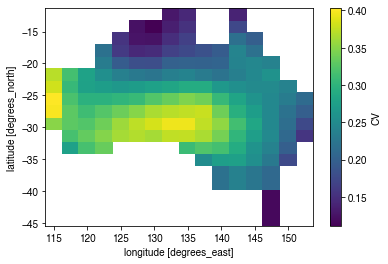

In [24]:
ff2_precip_lm_annual_aus.CV.plot()

In [25]:
calculate_cv(bcc_precip_hist_annual_aus)
calculate_cv(ccsm4_precip_hist_annual_aus)
calculate_cv(csiro_mk3l_precip_hist_annual_aus)
calculate_cv(fgoals_s2_precip_hist_annual_aus)
calculate_cv(giss_28_precip_hist_annual_aus)
calculate_cv(hadcm3_precip_hist_annual_aus)
calculate_cv(ipsl_precip_hist_annual_aus)
calculate_cv(miroc_precip_hist_annual_aus)
calculate_cv(mpi_precip_hist_annual_aus)
calculate_cv(mri_precip_hist_annual_aus)
calculate_cv(ff2_precip_hist_annual_aus)

<xarray.Dataset>
Dimensions:                           (lat: 15, lon: 16, year: 106)
Coordinates:
  * lon                               (lon) float64 115.0 117.5 ... 150.0 152.5
  * lat                               (lat) float64 -42.63 -36.95 ... -12.32
  * year                              (year) int64 1900 1901 1902 ... 2004 2005
Data variables:
    PRECT                             (year, lat, lon) float32 ...
    PRECT_mm                          (year, lat, lon) float64 nan nan ... nan
    drought_years_2s2e                (year, lat, lon) float64 ...
    drought_years_median              (year, lat, lon) float64 ...
    drought_years_20perc              (year, lat, lon) float64 ...
    drought_years_120pc_2med          (year, lat, lon) float64 ...
    drought_years_220pc_1med          (year, lat, lon) float64 ...
    droughts_2s2e                     (year, lat, lon) float64 ...
    droughts_median                   (year, lat, lon) float64 ...
    droughts_20perc                   (year, lat, lon) float64 ...
    droughts_120pc_2med               (year, lat, lon) float64 ...
    droughts_220pc_1med               (year, lat, lon) float64 ...
    droughts_2s2e_max                 (lat, lon) float64 ...
    droughts_median_max               (lat, lon) float64 ...
    droughts_20perc_max               (lat, lon) float64 ...
    droughts_120pc_2med_max           (lat, lon) float64 ...
    droughts_220pc_1med_max           (lat, lon) float64 ...
    droughts_2s2e_mean                (lat, lon) float64 ...
    droughts_median_mean              (lat, lon) float64 ...
    droughts_20perc_mean              (lat, lon) float64 ...
    droughts_120pc_2med_mean          (lat, lon) float64 ...
    droughts_220pc_1med_mean          (lat, lon) float64 ...
    droughts_2s2e_no_of_events        (lat, lon) float64 ...
    droughts_median_no_of_events      (lat, lon) float64 ...
    droughts_20perc_no_of_events      (lat, lon) float64 ...
    droughts_120pc_2med_no_of_events  (lat, lon) float64 ...
    droughts_220pc_1med_no_of_events  (lat, lon) float64 ...
    droughts_2s2e_std                 (lat, lon) float64 ...
    droughts_median_std               (lat, lon) float64 ...
    droughts_20perc_std               (lat, lon) float64 ...
    droughts_120pc_2med_std           (lat, lon) float64 ...
    droughts_220pc_1med_std           (lat, lon) float64 ...
    droughts_2s2e_intensity           (year, lat, lon) float64 ...
    droughts_median_intensity         (year, lat, lon) float64 ...
    droughts_20perc_intensity         (year, lat, lon) float64 ...
    droughts_120pc_2med_intensity     (year, lat, lon) float64 ...
    droughts_220pc_1med_intensity     (year, lat, lon) float64 ...
    droughts_2s2e_severity            (year, lat, lon) float64 ...
    droughts_median_severity          (year, lat, lon) float64 ...
    droughts_20perc_severity          (year, lat, lon) float64 ...
    droughts_120pc_2med_severity      (year, lat, lon) float64 ...
    droughts_220pc_1med_severity      (year, lat, lon) float64 ...
    CV                                (lat, lon) float64 nan nan nan ... nan nan

In [32]:
cpt = gmtColormap.gmtColormap('/Users/nickywright/Data/ColourPalettes/temperature-1.cpt')
palette = LinearSegmentedColormap('my_colormap', cpt)

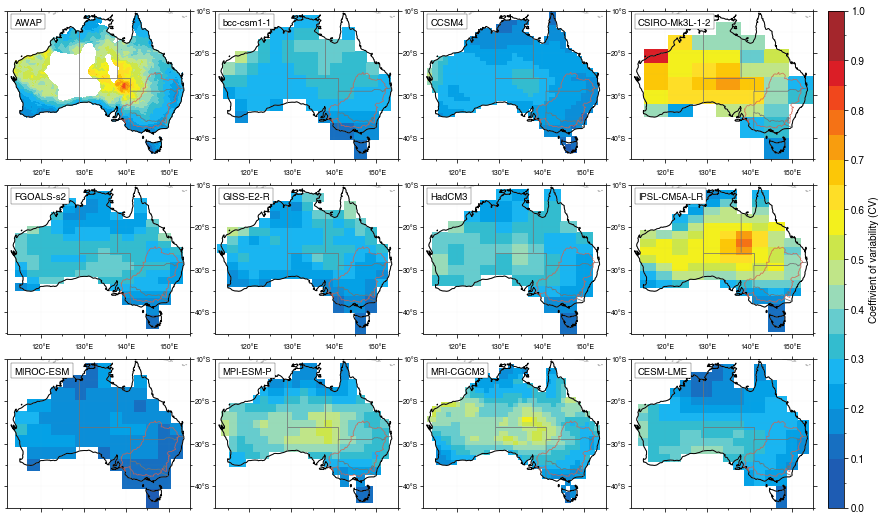

In [59]:
drought_type = 'CV'
drought_type_sig = 'CV'

data_hist = [awap_gf_annual[drought_type], bcc_precip_hist_annual_aus[drought_type], ccsm4_precip_hist_annual_aus[drought_type], 
             csiro_mk3l_precip_hist_annual_aus[drought_type],
             fgoals_s2_precip_hist_annual_aus[drought_type], giss_28_precip_hist_annual_aus[drought_type],
             hadcm3_precip_hist_annual_aus[drought_type], ipsl_precip_hist_annual_aus[drought_type],
             miroc_precip_hist_annual_aus[drought_type], mpi_precip_hist_annual_aus[drought_type],
             mri_precip_hist_annual_aus[drought_type], ff2_precip_hist_annual_aus[drought_type]]

colorbar_label = ['Coeffivient of variability (CV)']
contour_levels_max = np.arange(0, 1.05, 0.05)
# cmap_max = plt.cm.get_cmap('Spectral_r')
cmap = palette
# cmap_max.set_over('#525252')
cbar_minor_ticks_actual = np.arange(0,1.05,0.05)


plot_maps(lons_hist, lats_hist, data_hist, cmap, contour_levels_max,
          colorbar_label, '/Users/nickywright/PostDoc/Manuscripts/Wright_etal_drought-frequencies/Figure2/Fig2', np.arange(0, 1.2, 0.1), 
          None, cbar_minor_ticks=True)



